# **목차**

## **1. 서론**  
---
## **2. CSV 불러오기**  
###  1) 데이터 병합  

---
## **3. actual_weather**  
###  1) 필요한 데이터만 남긴 후 제거  
###  2) 열이름 변경  
###  3) NaN을 0으로 대체  
###  4) 파일로 저장(실제관측데이터.csv)  
---

## **4. forecast_weather**  
###  1) 통합예보 데이터  
* 데이터 합치기
* 중복 컬럼 제거

###  2) 날짜
* 행 추가
* 형식 변경 및 채우기  

###  3) 시간  
* 형식 변경
* 행 삭제  

###  4) 일시  
* 일시 생성
* 열 삭제  

###  5) 예측시간  
###  6) 열 재정렬 및 열 이름 변경  
###  7) 파일로 저장(통합예보데이터.csv)  

---
## **5. 통합데이터**  
###  1) 통합예보와 실제관측 데이터 병합    
###  2) 오차 열 생성  
###  3) 열 재정렬  
###  4) 결측값 NaN으로 변환 후 제거  
###  5) 파일로 저장(통합데이터.csv)  
---

## **6. 시각화**  
###  1) 폰트 설정(한글)  
###  2) 특정 날짜 카테고리 별 오차    
* 함수로 정의  
* 기온  
* 강수량  
* 특정 날짜 카테고리 별 오차 결론  

###  3) 월별 평균 오차  
* 월별 평균 오차 결론  
  
###  4) 시간대별 평균 오차  
* 10시에 기온 오차가 낮은 원인 분석  
* 시간대별 평균 오차 결론  
  
###  5) 계절별 오차율  
* 선 그래프  
* 히트맵  
* 계절별 오차율 결론  
  
###  6) 실제/예측 시계열 - 일별 평균  
* 실제/예측 시계열 - 일별 평균 결론  
  
###  7) 기온/강수량 예보 정확도  
* 기온/강수량 예보 정확도 결론  

---
## **7. 결론**





# **1. 서론**
본 보고서는 특정 날짜 및 시간대별 기온 및 강수량 예측 오차를 분석하고, 예측 정확도를 평가하여 예보 모델의 개선 방안을 제시하는 것을 목적으로 합니다.  
분석에 사용된 데이터는 2023년의 기온과 강수량 예측 결과를 바탕으로 다양한 시간대, 월별, 계절별 오차율을 살펴보았습니다.

# **2. CSV 불러오기**
2023년도 데이터 + 2022년 12월 29-31일 데이터 추가 (예보 데이터)

최대 79시간 후인 1월1일 날씨를 예측한 데이터가 2022년 12월 데이터 안에 존재하기 때문에 파일을 추가하였습니다.

---

**위치**
*   단기예보와 종관기상관측 데이터가 공통적으로 존재하는 "인천 강화 불은면" 위치 데이터를 사용
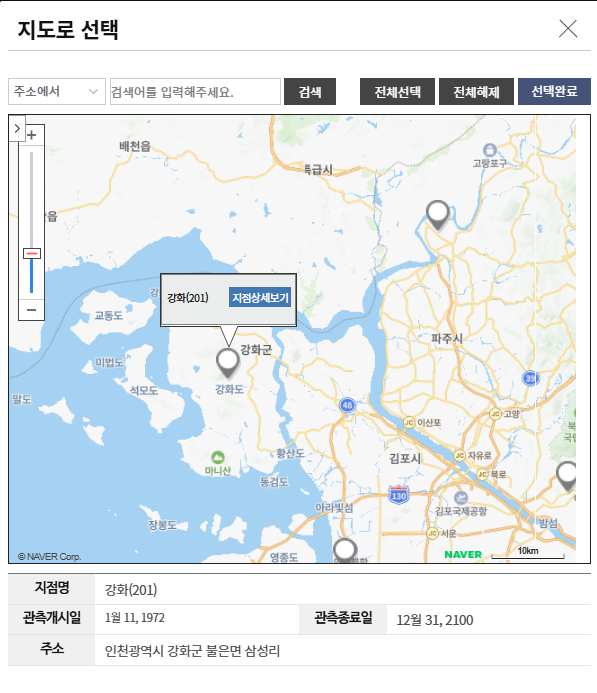

**단기예보**
*   단기예보 데이터는 6-79시간 후의 데이터가 3시간 간격으로 존재
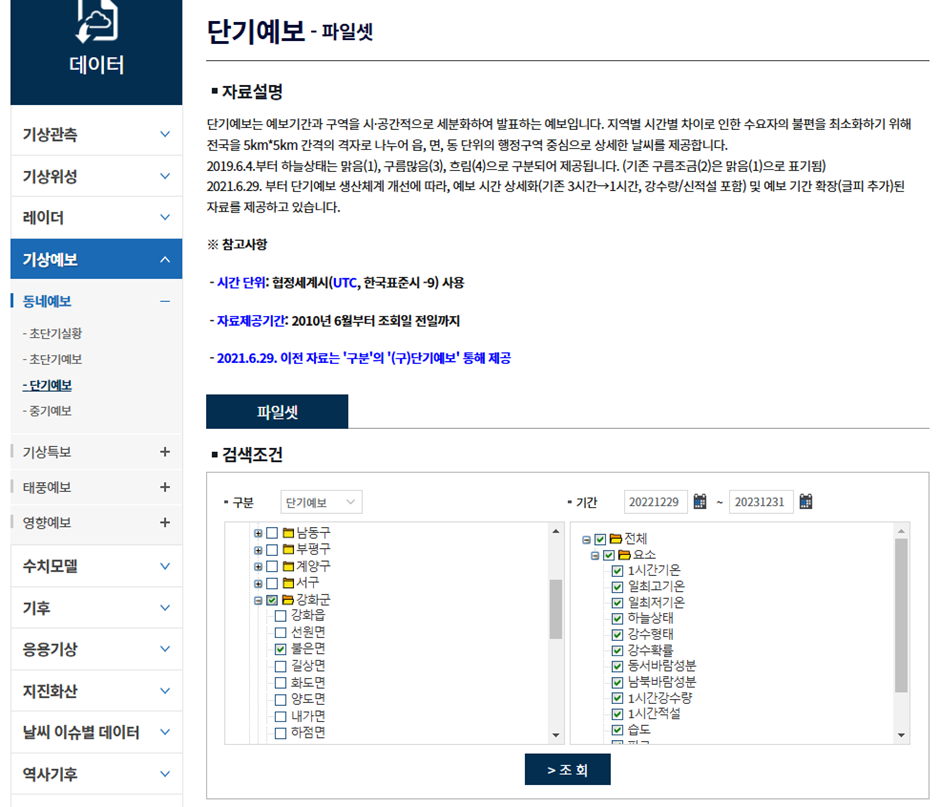


**종관기상관측**
*   종관기상관측 데이터는 1시간 간격으로 존재
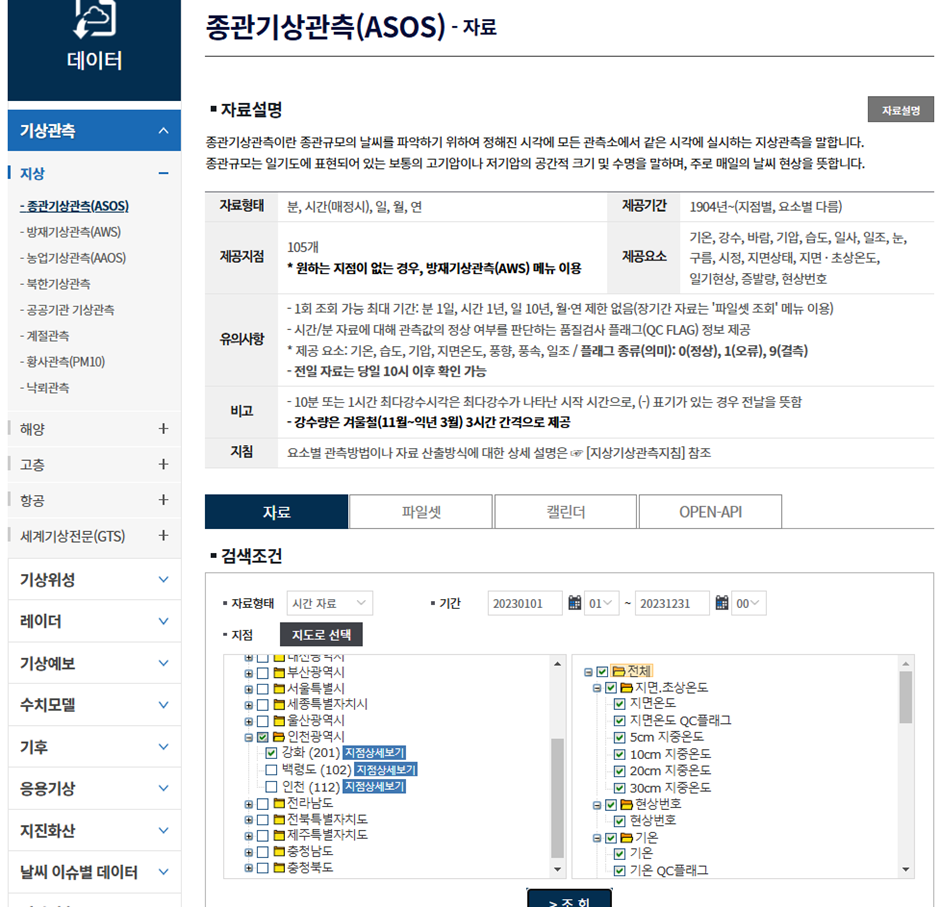


**공통 데이터**
*   두 데이터의 공통 데이터 (기온, 강수량, 적설, 습도, 풍속, 풍향) 사용

In [391]:
import pandas as pd
import numpy as np

actual_weather_path = './SURFACE_ASOS_201_HR_2023_2023_2024.csv'

forecast_rain_path = './불은면_1시간강수량_20230101_20231231.csv'
forecast_temp_path = './불은면_1시간기온_20230101_20231231.csv'
forecast_snow_path = './불은면_1시간적설_20230101_20231231.csv'
forecast_humidity_path = './불은면_습도_20230101_20231231.csv'
forecast_wind_speed_path = './불은면_풍속_20230101_20231231.csv'
forecast_wind_direction_path = './불은면_풍향_20230101_20231231.csv'

add_forecast_rain_path = './불은면_1시간강수량_20221229_20221231.csv'
add_forecast_temp_path = './불은면_1시간기온_20221229_20221231.csv'
add_forecast_snow_path = './불은면_1시간적설_20221229_20221231.csv'
add_forecast_humidity_path = './불은면_습도_20221229_20221231.csv'
add_forecast_wind_speed_path = './불은면_풍속_20221229_20221231.csv'
add_forecast_wind_direction_path = './불은면_풍향_20221229_20221231.csv'

actual_weather = pd.read_csv(actual_weather_path, encoding='cp949')

forecast_rain = pd.read_csv(forecast_rain_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '강수량'])
forecast_temp = pd.read_csv(forecast_temp_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '기온'])
forecast_snow = pd.read_csv(forecast_snow_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '적설'])
forecast_humidity = pd.read_csv(forecast_humidity_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '습도'])
forecast_wind_speed = pd.read_csv(forecast_wind_speed_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '풍속'])
forecast_wind_direction = pd.read_csv(forecast_wind_direction_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '풍향'])

add_forecast_rain = pd.read_csv(add_forecast_rain_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '강수량'])
add_forecast_temp = pd.read_csv(add_forecast_temp_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '기온'])
add_forecast_snow = pd.read_csv(add_forecast_snow_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '적설'])
add_forecast_humidity = pd.read_csv(add_forecast_humidity_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '습도'])
add_forecast_wind_speed = pd.read_csv(add_forecast_wind_speed_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '풍속'])
add_forecast_wind_direction = pd.read_csv(add_forecast_wind_direction_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '풍향'])

# print("실제 기상 데이터\n", actual_weather.head())
# print("\n1시간 강수량 데이터\n", forecast_rain.head())
# print("\n1시간 기온 데이터\n", forecast_temp.head())
# print("\n1시간 적설량 데이터\n", forecast_snow.head())

### 1) 데이터 병합

In [392]:
fw_rain_df = pd.concat([add_forecast_rain, forecast_rain], ignore_index=True)
fw_temp_df = pd.concat([add_forecast_temp, forecast_temp], ignore_index=True)
fw_snow_df = pd.concat([add_forecast_snow, forecast_snow], ignore_index=True)
fw_humidity_df = pd.concat([add_forecast_humidity, forecast_humidity], ignore_index=True)
fw_wind_speed_df = pd.concat([add_forecast_wind_speed, forecast_wind_speed], ignore_index=True)
fw_wind_direction_df = pd.concat([add_forecast_wind_direction, forecast_wind_direction], ignore_index=True)

# **3. actual_weather**

## 1) 필요한 데이터만 남긴 후 제거
공통되는 데이터: 기온, 강수량, 적설, 습도, 풍속, 풍향

In [393]:
aw_df = pd.DataFrame(actual_weather)

# 원본 데이터 변경 전 확인
aw_df_filtered = aw_df.iloc[:, 1:7].join(aw_df.iloc[:, [13]])
#print(aw_df_filtered)

aw_df = aw_df_filtered

## 2) 열이름 변경

In [394]:
# 열 이름 변경
aw_df = aw_df.rename(columns={
    '일시': '관측일시',
    '기온(°C)': '기온_실제',
    '강수량(mm)': '강수량_실제',
    '풍속(m/s)': '풍속_실제',
    '풍향(16방위)': '풍향_실제',
    '습도(%)': '습도_실제',
    '적설(cm)': '적설_실제'
})

print(aw_df)

                  관측일시  기온_실제  강수량_실제  풍속_실제  풍향_실제  습도_실제  적설_실제
0     2023-01-01 00:00    3.2     NaN    2.8  290.0     69    3.0
1     2023-01-01 01:00    2.9     NaN    2.3  270.0     66    3.0
2     2023-01-01 02:00    2.1     NaN    2.4  270.0     71    3.0
3     2023-01-01 03:00    2.0     NaN    1.1  180.0     65    3.0
4     2023-01-01 04:00    0.7     NaN    1.1  200.0     57    3.0
...                ...    ...     ...    ...    ...    ...    ...
8755  2023-12-31 19:00    0.3     NaN    1.5  360.0    100    NaN
8756  2023-12-31 20:00   -0.7     NaN    0.7  340.0    100    NaN
8757  2023-12-31 21:00   -1.6     NaN    0.7  340.0    100    NaN
8758  2023-12-31 22:00   -1.6     NaN    1.0  360.0    100    NaN
8759  2023-12-31 23:00   -2.2     NaN    0.8   20.0    100    NaN

[8760 rows x 7 columns]


## 3) NaN을 0으로 대체
강수량 데이터는 비가 안 올 것이라 예측한 경우 NaN값

In [395]:
# NaN 값을 0으로 채우기
aw_df.fillna(0, inplace=True)

#결과 출력
print(aw_df)

                  관측일시  기온_실제  강수량_실제  풍속_실제  풍향_실제  습도_실제  적설_실제
0     2023-01-01 00:00    3.2     0.0    2.8  290.0     69    3.0
1     2023-01-01 01:00    2.9     0.0    2.3  270.0     66    3.0
2     2023-01-01 02:00    2.1     0.0    2.4  270.0     71    3.0
3     2023-01-01 03:00    2.0     0.0    1.1  180.0     65    3.0
4     2023-01-01 04:00    0.7     0.0    1.1  200.0     57    3.0
...                ...    ...     ...    ...    ...    ...    ...
8755  2023-12-31 19:00    0.3     0.0    1.5  360.0    100    0.0
8756  2023-12-31 20:00   -0.7     0.0    0.7  340.0    100    0.0
8757  2023-12-31 21:00   -1.6     0.0    0.7  340.0    100    0.0
8758  2023-12-31 22:00   -1.6     0.0    1.0  360.0    100    0.0
8759  2023-12-31 23:00   -2.2     0.0    0.8   20.0    100    0.0

[8760 rows x 7 columns]


## 4) 파일로 저장 (실제관측데이터.csv)

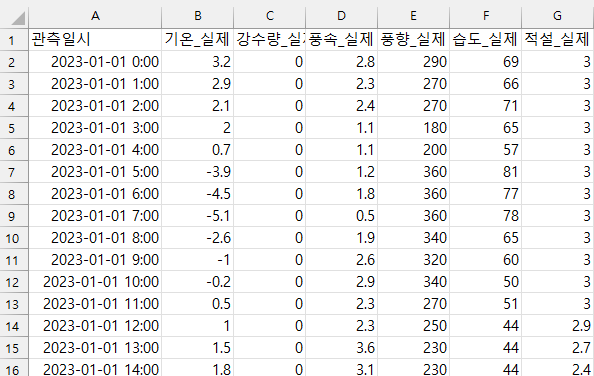

In [396]:
# actual_weather를 '실제관측데이터.csv' 파일로 저장
aw_df.to_csv('실제관측데이터.csv', index=False, encoding='cp949')

# **4. forecast_weather**

## 1) 통합예보 데이터

### 데이터 합치기

In [397]:
# 각 데이터프레임에 날짜와 시간 예보시간 기준으로 합치기
forecast_weather = pd.concat([fw_rain_df, fw_temp_df, fw_snow_df, fw_humidity_df, fw_wind_speed_df, fw_wind_direction_df],
                          axis=1)

fw_df = pd.DataFrame(forecast_weather)

### 중복 컬럼 제거

In [398]:
# 중복되는 날짜와 시간 컬럼 제거 (첫 번째 데이터프레임 기준으로 유지)
fw_df = fw_df.loc[:, ~fw_df.columns.duplicated()]

# forecast_weather를 '통합예보데이터.csv' 파일로 저장
fw_df.to_csv('통합예보데이터.csv', index=False, encoding='cp949')

## 2) 날짜

### 행 추가
원본 데이터 상 파일당 첫 번째 행에만 없는 정보 추가

In [399]:
# 2023년 1월 1일 데이터에만 없는 날짜 안내 행 추가
# 빈 문자열을 NaN으로 변경하여 할당 ("" 빈 문자열을 넣었다가 데이터 타입 불일치 오류 발생 -> NaN으로 해결)
# 첫 번째 행 위치에 새로운 데이터 삽입
new_row = {
    '날짜': 'Start : 20221229',
    '시간': np.nan,
    '예보시간': np.nan,
    '강수량': np.nan,
    '기온': np.nan,
    '적설': np.nan,
    '습도': np.nan,
    '풍속': np.nan,
    '풍향': np.nan
}

fw_df = pd.concat([pd.DataFrame([new_row]), fw_df]).reset_index(drop=True)

# 1528번째 행 위치에 새로운 데이터 삽입
new_row = {
    '날짜': ' Start : 20230101 ',
    '시간': np.nan,
    '예보시간': np.nan,
    '강수량': np.nan,
    '기온': np.nan,
    '적설': np.nan,
    '습도': np.nan,
    '풍속': np.nan,
    '풍향': np.nan
}

# 데이터프레임 슬라이싱 후 새로운 행 삽입
fw_df = pd.concat([fw_df.iloc[:1527], pd.DataFrame([new_row]), fw_df.iloc[1527:]]).reset_index(drop=True)

# forecast_weather를 '통합예보데이터.csv' 파일로 저장
fw_df.to_csv('통합예보데이터.csv', index=False, encoding='cp949')

# 결과 확인
# print(fw_df.head())

### 형식 변경 및 채우기

In [400]:
### 날짜: Start:20230102 형식으로 중간중간 문자열 데이터 존재 -> 년월일 추출해 변환 2023-01-01
# Start 행 날짜 형식으로 변경
for day in fw_df['날짜']:
  if "Start" in day:
    date_str = day.split(":")[1].strip()
    # 날짜 형식 변경: "20231003" -> "2023-10-03"
    formatted_date = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}"
    #print(formatted_date)
    fw_df.loc[fw_df['날짜'] == day, '날짜'] = formatted_date

# 날짜 열에서 숫자형이거나 다른 형식은 NaN으로 변환
fw_df['날짜'] = fw_df['날짜'].apply(lambda x: x if isinstance(x, str) and len(x) == 10 else np.nan)

# 숫자 행을 이전 행인 변경한 날짜로 채우기
fw_df['날짜'] = fw_df['날짜'].ffill()

print(fw_df)

# forecast_weather를 '통합예보데이터.csv' 파일로 저장
fw_df.to_csv('통합예보데이터.csv', index=False, encoding='cp949')

                날짜      시간  예보시간  강수량   기온   적설    습도   풍속     풍향
0       2022-12-29     NaN   NaN  NaN  NaN  NaN   NaN  NaN    NaN
1       2022-12-29   200.0   6.0  0.0 -4.0  0.0  60.0  1.7  225.0
2       2022-12-29   200.0   7.0  0.0 -5.0  0.0  70.0  1.6  202.0
3       2022-12-29   200.0   8.0  0.0 -6.0  0.0  70.0  1.5  135.0
4       2022-12-29   200.0   9.0  0.0 -6.0  0.0  75.0  1.7   27.0
...            ...     ...   ...  ...  ...  ...   ...  ...    ...
187308  2023-12-31  2300.0  61.0  0.0 -2.0  0.0  85.0  2.9  316.0
187309  2023-12-31  2300.0  62.0  0.0 -2.0  0.0  85.0  2.5  318.0
187310  2023-12-31  2300.0  63.0  0.0 -3.0  0.0  85.0  2.1  323.0
187311  2023-12-31  2300.0  64.0  0.0  NaN  0.0  85.0  1.9  328.0
187312  2023-12-31     NaN   NaN  NaN  NaN  NaN   NaN  NaN    NaN

[187313 rows x 9 columns]


## 3) 시간

### 형식 변경

In [401]:
# 시간: 2시 200 으로 표기 -> 2:00 시간 형식으로 변환
fw_df['시간'] = fw_df['시간'].apply(
    lambda x: f"{int(x) // 100:02}:{int(x) % 100:02}" if pd.notnull(x) and x != '' else x
    )
print(fw_df['시간'])

0           NaN
1         02:00
2         02:00
3         02:00
4         02:00
          ...  
187308    23:00
187309    23:00
187310    23:00
187311    23:00
187312      NaN
Name: 시간, Length: 187313, dtype: object


### 행 삭제
추가 및 변경 했던 행 삭제

In [403]:
# 변경했던 Start 날짜 행 제거하기(NaN이 6개 이상일 경우)
fw_df = fw_df[fw_df.isna().sum(axis=1) < 6]

print(fw_df)

                날짜     시간  예보시간  강수량   기온   적설    습도   풍속     풍향
1       2022-12-29  02:00   6.0  0.0 -4.0  0.0  60.0  1.7  225.0
2       2022-12-29  02:00   7.0  0.0 -5.0  0.0  70.0  1.6  202.0
3       2022-12-29  02:00   8.0  0.0 -6.0  0.0  70.0  1.5  135.0
4       2022-12-29  02:00   9.0  0.0 -6.0  0.0  75.0  1.7   27.0
5       2022-12-29  02:00  10.0  0.0 -5.0  0.0  75.0  1.9   27.0
...            ...    ...   ...  ...  ...  ...   ...  ...    ...
187307  2023-12-31  23:00  60.0  0.0 -1.0  0.0  85.0  3.3  315.0
187308  2023-12-31  23:00  61.0  0.0 -2.0  0.0  85.0  2.9  316.0
187309  2023-12-31  23:00  62.0  0.0 -2.0  0.0  85.0  2.5  318.0
187310  2023-12-31  23:00  63.0  0.0 -3.0  0.0  85.0  2.1  323.0
187311  2023-12-31  23:00  64.0  0.0  NaN  0.0  85.0  1.9  328.0

[186944 rows x 9 columns]


## 4) 일시

### 일시 생성
날짜와 시간을 결합해 일시 생성

In [404]:
### 일시: 날짜 + 시간 -> datetime 형식으로 결합 2023-01-01 2:00
fw_df['일시'] = fw_df['날짜'].astype(str) + ' ' + fw_df['시간']
fw_df['일시'] = pd.to_datetime(fw_df['일시'], format='%Y-%m-%d %H:%M')
print(fw_df['일시'])

# forecast_weather를 '통합예보데이터.csv' 파일로 저장
# fw_df.to_csv('통합예보데이터.csv', index=False, encoding='cp949')

1        2022-12-29 02:00:00
2        2022-12-29 02:00:00
3        2022-12-29 02:00:00
4        2022-12-29 02:00:00
5        2022-12-29 02:00:00
                 ...        
187307   2023-12-31 23:00:00
187308   2023-12-31 23:00:00
187309   2023-12-31 23:00:00
187310   2023-12-31 23:00:00
187311   2023-12-31 23:00:00
Name: 일시, Length: 186944, dtype: datetime64[ns]


### 열 삭제
날짜와 시간 컬럼 삭제

In [405]:
# 원본 데이터 변경 전 확인
fw_df_filtered = fw_df.drop(columns=['날짜', '시간'])
#print(fw_df_filtered)

fw_df = fw_df_filtered
#print(fw_df)

## 5) 예측시간

In [406]:
# "예보시간"을 시간으로 변환 후 "일시"에 더해 "예측시간" 열 생성
fw_df['예측일시'] = fw_df['일시'] + pd.to_timedelta(fw_df['예보시간'], unit='h')
print(fw_df)

        예보시간  강수량   기온   적설    습도   풍속     풍향                  일시  \
1        6.0  0.0 -4.0  0.0  60.0  1.7  225.0 2022-12-29 02:00:00   
2        7.0  0.0 -5.0  0.0  70.0  1.6  202.0 2022-12-29 02:00:00   
3        8.0  0.0 -6.0  0.0  70.0  1.5  135.0 2022-12-29 02:00:00   
4        9.0  0.0 -6.0  0.0  75.0  1.7   27.0 2022-12-29 02:00:00   
5       10.0  0.0 -5.0  0.0  75.0  1.9   27.0 2022-12-29 02:00:00   
...      ...  ...  ...  ...   ...  ...    ...                 ...   
187307  60.0  0.0 -1.0  0.0  85.0  3.3  315.0 2023-12-31 23:00:00   
187308  61.0  0.0 -2.0  0.0  85.0  2.9  316.0 2023-12-31 23:00:00   
187309  62.0  0.0 -2.0  0.0  85.0  2.5  318.0 2023-12-31 23:00:00   
187310  63.0  0.0 -3.0  0.0  85.0  2.1  323.0 2023-12-31 23:00:00   
187311  64.0  0.0  NaN  0.0  85.0  1.9  328.0 2023-12-31 23:00:00   

                      예측일시  
1      2022-12-29 08:00:00  
2      2022-12-29 09:00:00  
3      2022-12-29 10:00:00  
4      2022-12-29 11:00:00  
5      2022-12-29 12:00:00

## 6) 열 재정렬 및 열 이름 변경


In [407]:
# 열 순서 변경
cols = ['일시', '예보시간', '예측일시', '기온', '강수량', '풍속', '풍향', '습도', '적설']
fw_df = fw_df[cols]

# 열 이름 변경
fw_df = fw_df.rename(columns={
    '기온': '기온_예측',
    '강수량': '강수량_예측',
    '풍속': '풍속_예측',
    '풍향': '풍향_예측',
    '습도': '습도_예측',
    '적설': '적설_예측'
})

# 결과 출력
print(fw_df)

                        일시  예보시간                예측일시  기온_예측  강수량_예측  풍속_예측  \
1      2022-12-29 02:00:00   6.0 2022-12-29 08:00:00   -4.0     0.0    1.7   
2      2022-12-29 02:00:00   7.0 2022-12-29 09:00:00   -5.0     0.0    1.6   
3      2022-12-29 02:00:00   8.0 2022-12-29 10:00:00   -6.0     0.0    1.5   
4      2022-12-29 02:00:00   9.0 2022-12-29 11:00:00   -6.0     0.0    1.7   
5      2022-12-29 02:00:00  10.0 2022-12-29 12:00:00   -5.0     0.0    1.9   
...                    ...   ...                 ...    ...     ...    ...   
187307 2023-12-31 23:00:00  60.0 2024-01-03 11:00:00   -1.0     0.0    3.3   
187308 2023-12-31 23:00:00  61.0 2024-01-03 12:00:00   -2.0     0.0    2.9   
187309 2023-12-31 23:00:00  62.0 2024-01-03 13:00:00   -2.0     0.0    2.5   
187310 2023-12-31 23:00:00  63.0 2024-01-03 14:00:00   -3.0     0.0    2.1   
187311 2023-12-31 23:00:00  64.0 2024-01-03 15:00:00    NaN     0.0    1.9   

        풍향_예측  습도_예측  적설_예측  
1       225.0   60.0    0.0  
2  

## 7) 파일로 저장 (통합예보데이터.csv)

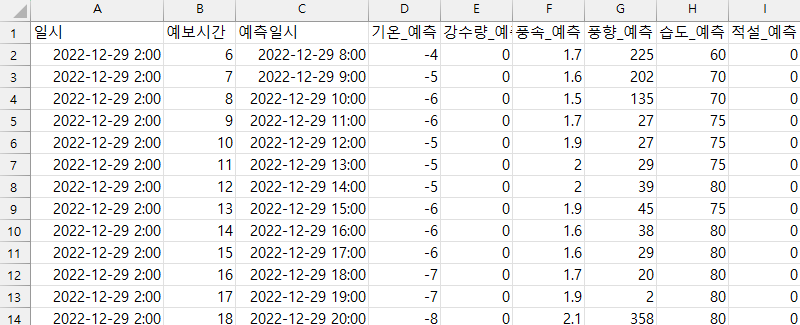

In [408]:
# forecast_weather를 '통합예보데이터.csv' 파일로 저장
fw_df.to_csv('통합예보데이터.csv', index=False, encoding='cp949')

# **5. 통합데이터**

## 1) 통합예보와 실제관측 데이터 병합
예측일시와 관측일시 기준으로 inner 병합

In [409]:
# 예보 데이터와 관측 데이터에서 날짜 열을 datetime 형식으로 변환
fw_df['예측일시'] = pd.to_datetime(fw_df['예측일시'])
aw_df['관측일시'] = pd.to_datetime(aw_df['관측일시'])

# 예보 데이터를 실제 관측 데이터와 병합
merged_df = pd.merge(
    fw_df,  # 예보 데이터
    aw_df,  # 관측 데이터
    left_on="예측일시",  # 예보 데이터의 예측일시
    right_on="관측일시",  # 관측 데이터의 관측일시
    how="inner"  # 내부 병합
)

merged_df = merged_df.sort_values(by=["예측일시", "예보시간"])

print(merged_df.head(10))

# '통합데이터.csv' 파일로 저장
merged_df.to_csv('통합데이터.csv', index=False, encoding='cp949')

                     일시  예보시간       예측일시  기온_예측  강수량_예측  풍속_예측  풍향_예측  습도_예측  \
640 2022-12-31 17:00:00   7.0 2023-01-01    0.0     0.0    3.5  333.0   85.0   
576 2022-12-31 14:00:00  10.0 2023-01-01    0.0     0.0    3.5  333.0   85.0   
512 2022-12-31 11:00:00  13.0 2023-01-01    0.0     0.0    3.5  333.0   85.0   
448 2022-12-31 08:00:00  16.0 2023-01-01    0.0     0.0    3.5  333.0   85.0   
408 2022-12-31 05:00:00  19.0 2023-01-01    0.0     0.0    3.6  336.0   80.0   
368 2022-12-31 02:00:00  22.0 2023-01-01    0.0     0.0    3.6  336.0   80.0   
328 2022-12-30 23:00:00  25.0 2023-01-01   -4.0     0.0    3.6  336.0   80.0   
288 2022-12-30 20:00:00  28.0 2023-01-01   -4.0     0.0    3.6  336.0   80.0   
248 2022-12-30 17:00:00  31.0 2023-01-01   -4.0     0.0    2.9  338.0   85.0   
208 2022-12-30 14:00:00  34.0 2023-01-01   -4.0     0.0    2.9  338.0   85.0   

     적설_예측       관측일시  기온_실제  강수량_실제  풍속_실제  풍향_실제  습도_실제  적설_실제  
640    0.0 2023-01-01    3.2     0.0    2.8  290.0  

## 2) 오차 열 생성

In [410]:
# 새로운 오차 열 생성(절대값)
merged_df['기온_오차'] = abs(merged_df['기온_예측'] - merged_df['기온_실제'])
merged_df['강수량_오차'] = abs(merged_df['강수량_예측'] - merged_df['강수량_실제'])
merged_df['풍속_오차'] = abs(merged_df['풍속_예측'] - merged_df['풍속_실제'])
merged_df['풍향_오차'] = abs(merged_df['풍향_예측'] - merged_df['풍향_실제'])
merged_df['습도_오차'] = abs(merged_df['습도_예측'] - merged_df['습도_실제'])
merged_df['적설_오차'] = abs(merged_df['적설_예측'] - merged_df['적설_실제'])

## 3) 열 재정렬

In [411]:
# 열 순서 변경
cols = ['일시', '예보시간', '예측일시', '관측일시',
                  '기온_예측', '기온_실제',
                  '강수량_예측', '강수량_실제',
                  '풍속_예측', '풍속_실제',
                  '풍향_예측', '풍향_실제',
                  '습도_예측', '습도_실제',
                  '적설_예측', '적설_실제',
                  '기온_오차', '강수량_오차', '풍속_오차', '풍향_오차', '습도_오차', '적설_오차']
merged_df = merged_df[cols]


# 결과 확인
print(merged_df.head())

                     일시  예보시간       예측일시       관측일시  기온_예측  기온_실제  강수량_예측  \
640 2022-12-31 17:00:00   7.0 2023-01-01 2023-01-01    0.0    3.2     0.0   
576 2022-12-31 14:00:00  10.0 2023-01-01 2023-01-01    0.0    3.2     0.0   
512 2022-12-31 11:00:00  13.0 2023-01-01 2023-01-01    0.0    3.2     0.0   
448 2022-12-31 08:00:00  16.0 2023-01-01 2023-01-01    0.0    3.2     0.0   
408 2022-12-31 05:00:00  19.0 2023-01-01 2023-01-01    0.0    3.2     0.0   

     강수량_실제  풍속_예측  풍속_실제  ...  습도_예측  습도_실제  적설_예측  적설_실제  기온_오차  강수량_오차  \
640     0.0    3.5    2.8  ...   85.0     69    0.0    3.0    3.2     0.0   
576     0.0    3.5    2.8  ...   85.0     69    0.0    3.0    3.2     0.0   
512     0.0    3.5    2.8  ...   85.0     69    0.0    3.0    3.2     0.0   
448     0.0    3.5    2.8  ...   85.0     69    0.0    3.0    3.2     0.0   
408     0.0    3.6    2.8  ...   80.0     69    0.0    3.0    3.2     0.0   

     풍속_오차  풍향_오차  습도_오차  적설_오차  
640    0.7   43.0   16.0    3.0  
576   

## 4) 결측값 NaN으로 변환 후 제거



In [412]:
# -900보다 작거나 900보다 큰 값들을 NaN으로 변환
merged_df = merged_df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < -900 else x)
merged_df = merged_df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x > 900 else x)

# 결과 확인
print(merged_df.head())

# NaN 값이 포함된 행을 제거
merged_df = merged_df.dropna()

<ipython-input-412-5a855b4b4b5c>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < -900 else x)
<ipython-input-412-5a855b4b4b5c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x > 900 else x)


                     일시  예보시간       예측일시       관측일시  기온_예측  기온_실제  강수량_예측  \
640 2022-12-31 17:00:00   7.0 2023-01-01 2023-01-01    0.0    3.2     0.0   
576 2022-12-31 14:00:00  10.0 2023-01-01 2023-01-01    0.0    3.2     0.0   
512 2022-12-31 11:00:00  13.0 2023-01-01 2023-01-01    0.0    3.2     0.0   
448 2022-12-31 08:00:00  16.0 2023-01-01 2023-01-01    0.0    3.2     0.0   
408 2022-12-31 05:00:00  19.0 2023-01-01 2023-01-01    0.0    3.2     0.0   

     강수량_실제  풍속_예측  풍속_실제  ...  습도_예측  습도_실제  적설_예측  적설_실제  기온_오차  강수량_오차  \
640     0.0    3.5    2.8  ...   85.0     69    0.0    3.0    3.2     0.0   
576     0.0    3.5    2.8  ...   85.0     69    0.0    3.0    3.2     0.0   
512     0.0    3.5    2.8  ...   85.0     69    0.0    3.0    3.2     0.0   
448     0.0    3.5    2.8  ...   85.0     69    0.0    3.0    3.2     0.0   
408     0.0    3.6    2.8  ...   80.0     69    0.0    3.0    3.2     0.0   

     풍속_오차  풍향_오차  습도_오차  적설_오차  
640    0.7   43.0   16.0    3.0  
576   

## 5) 파일로 저장 (통합데이터.csv)

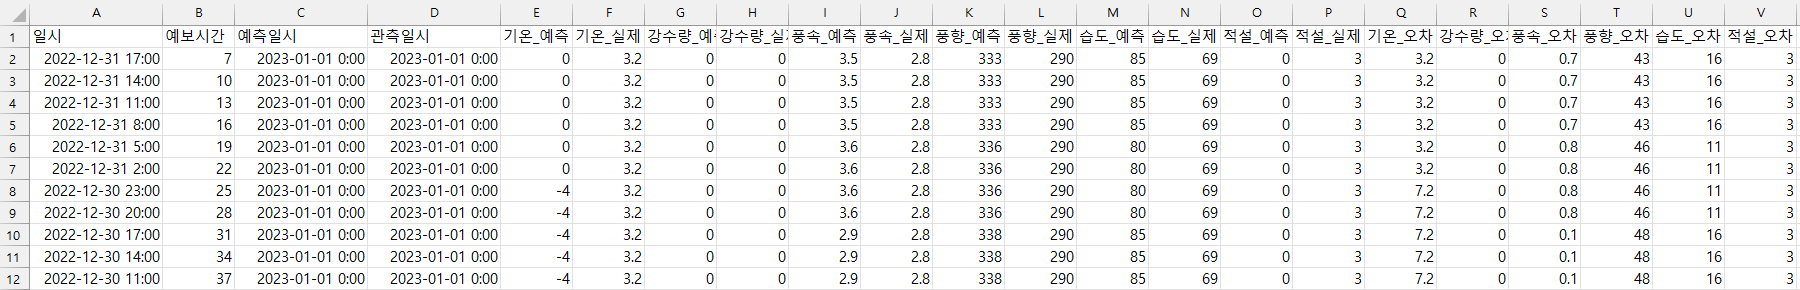

In [413]:
# '통합데이터.csv' 파일로 저장
merged_df.to_csv('통합데이터.csv', index=False, encoding='cp949')

# **6. 시각화**
나머지 공통 데이터인 **습도, 풍향, 풍속, 적설**은 원본 데이터가 적절하지 않아 시각화에서 제외시켰습니다.
* 습도, 풍향, 풍속: 오차 범위가 매우 큼
* 적설: 단기예보에서 적설 예보 데이터가 없음

## 1) 폰트 설정(한글)

In [414]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq -y install fonts-nanum > /dev/null

In [415]:
# 단계 2: 런타임 재시작
# import os
# os.kill(os.getpid(), 9)

In [416]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

## 2) 특정 날짜 카테고리 별 오차
기온과 강수량을 나누어 각 특징이 잘 드러나는 날짜 데이터를 뽑아 시간별 예보시간에 따라 오차 데이터를 시각화하였습니다.

### 함수로 정의

In [417]:
import matplotlib.pyplot as plt
import pandas as pd

# 시각화 함수 정의
def plot_metric(metric, title, ylabel, date, df):
    # 날짜에 맞는 데이터 필터링
    filtered_df = df[df["관측일시"].dt.date == pd.to_datetime(date).date()].copy()

    # 시간별로 선 그리기
    plt.figure(figsize=(12, 6))
    for time in sorted(filtered_df["관측일시"].dt.hour.unique()):
        hourly_data = filtered_df[filtered_df["관측일시"].dt.hour == time]
        plt.plot(
            hourly_data["예보시간"],
            hourly_data[metric],
            marker="o",
            label=f"{time}:00 ({metric})"
        )

    # 그래프 꾸미기
    plt.title(f"{date} 시간별 예보시간에 따른 {title}", fontsize=16)
    plt.xlabel("예보시간 (시간 전)", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")  # 범례를 그래프 바깥에 표시
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()


def plot_for_multiple_dates(dates, metric, title, ylabel, df):
    """
    여러 날짜에 대해 시각화 함수 호출
    :param dates: 시각화할 날짜들의 리스트
    :param metric: 분석할 데이터 컬럼 이름
    :param title: 그래프 제목
    :param ylabel: y축 레이블
    :param df: 전체 데이터프레임
    """
    for date in dates:
        plot_metric(metric, title, ylabel, date, df)

# '관측일시'를 datetime으로 변환
merged_df["관측일시"] = pd.to_datetime(merged_df["관측일시"], errors="coerce")

# 오차율 계산
error_cols = ["기온_오차", "강수량_오차"]
for col in error_cols:
    error_rate_col = f"{col}_오차율"
    merged_df.loc[:, error_rate_col] = (
        (merged_df[col].abs() / merged_df[col.replace("_오차", "_실제")].replace(0, 1)) * 100
    )

### 기온

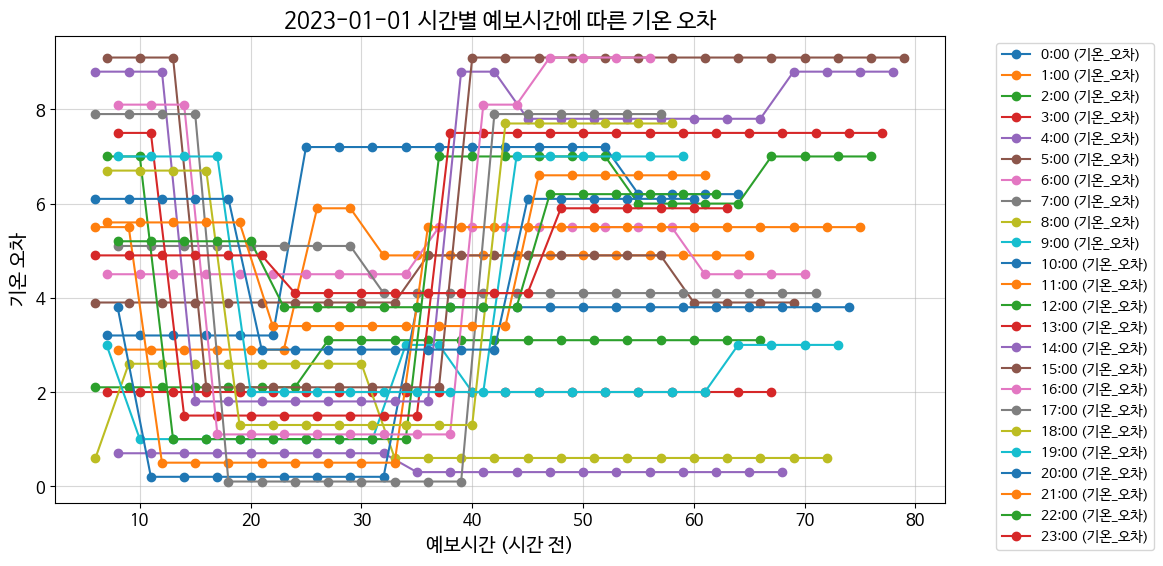

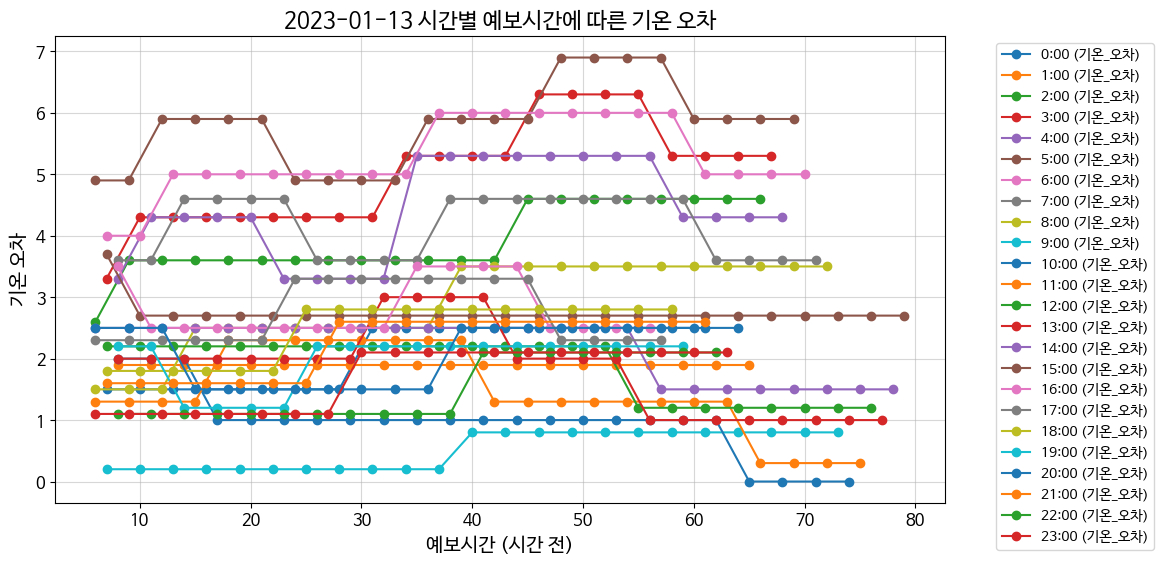

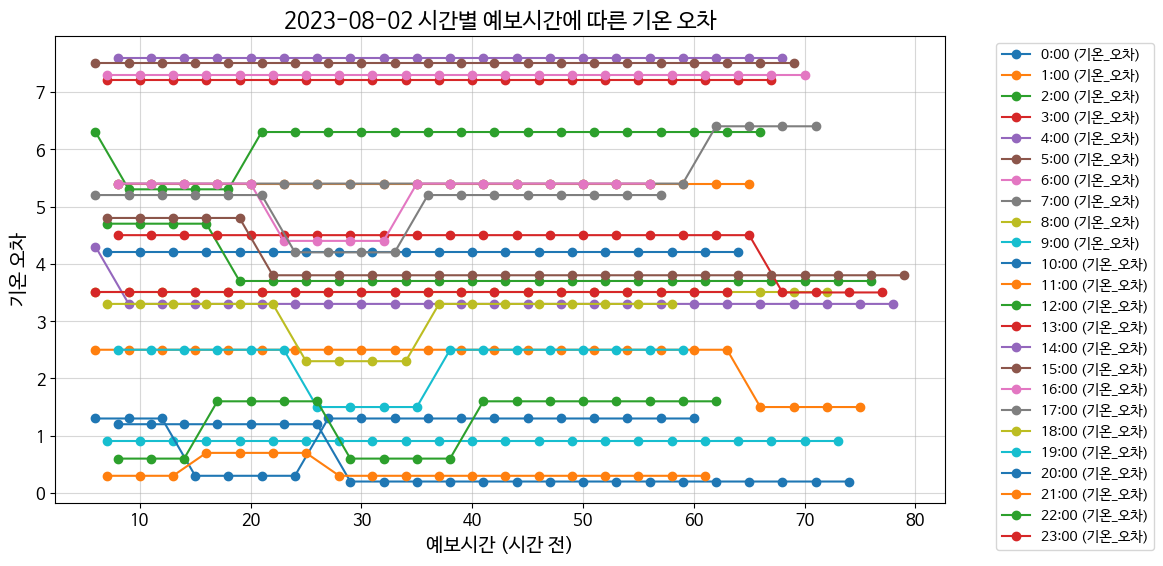

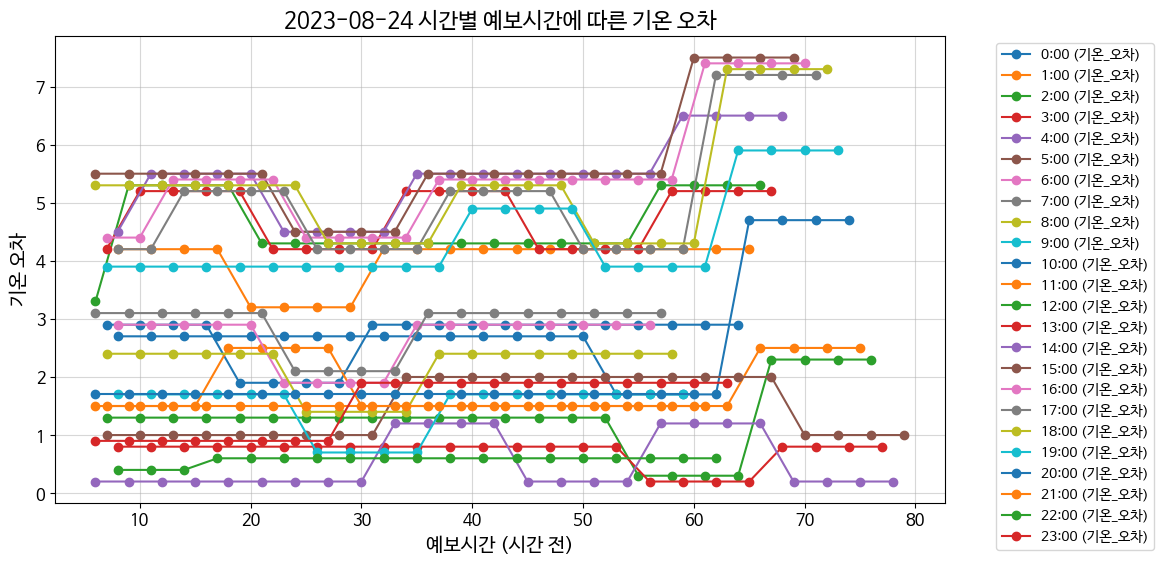

In [418]:
# 기온 시각화
dates_to_plot = ["2023-01-01", "2023-01-13", "2023-08-02", "2023-08-24"]

plot_for_multiple_dates(dates_to_plot, "기온_오차", "기온 오차", "기온 오차", merged_df)

### 강수량

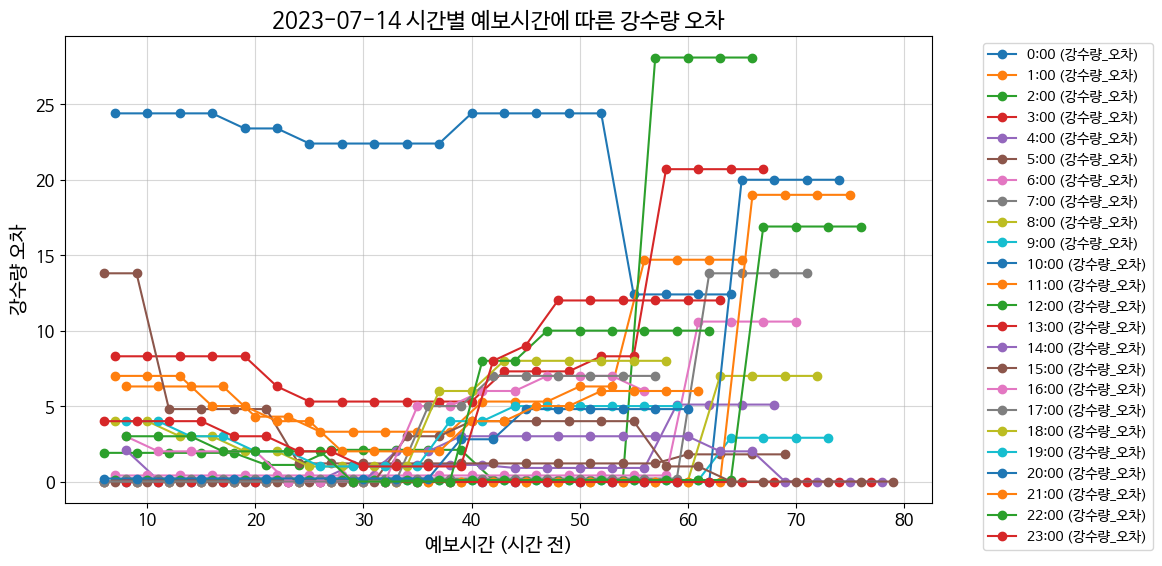

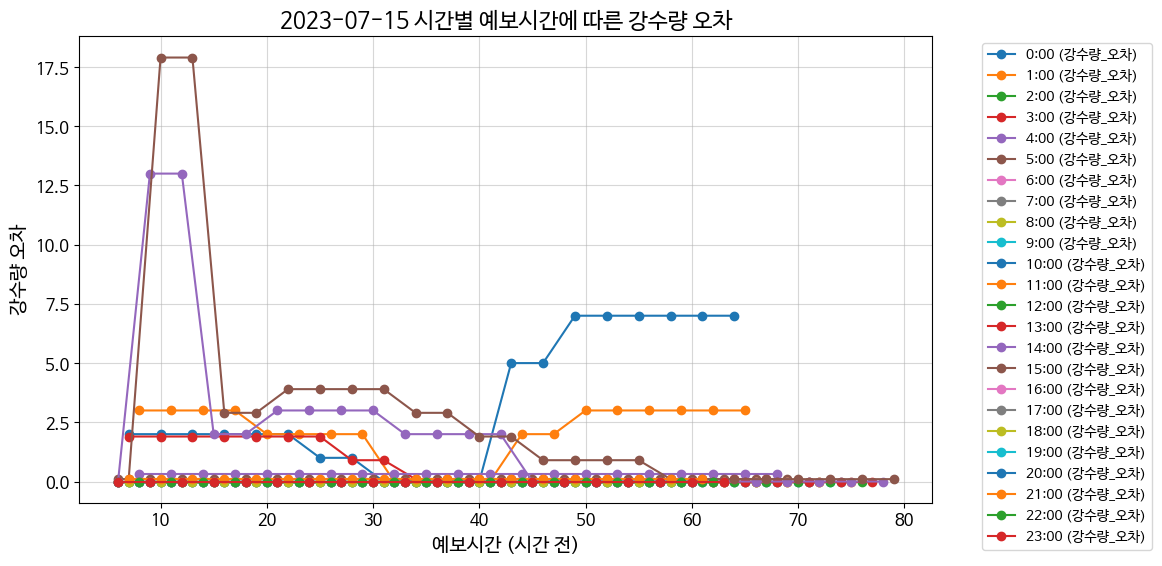

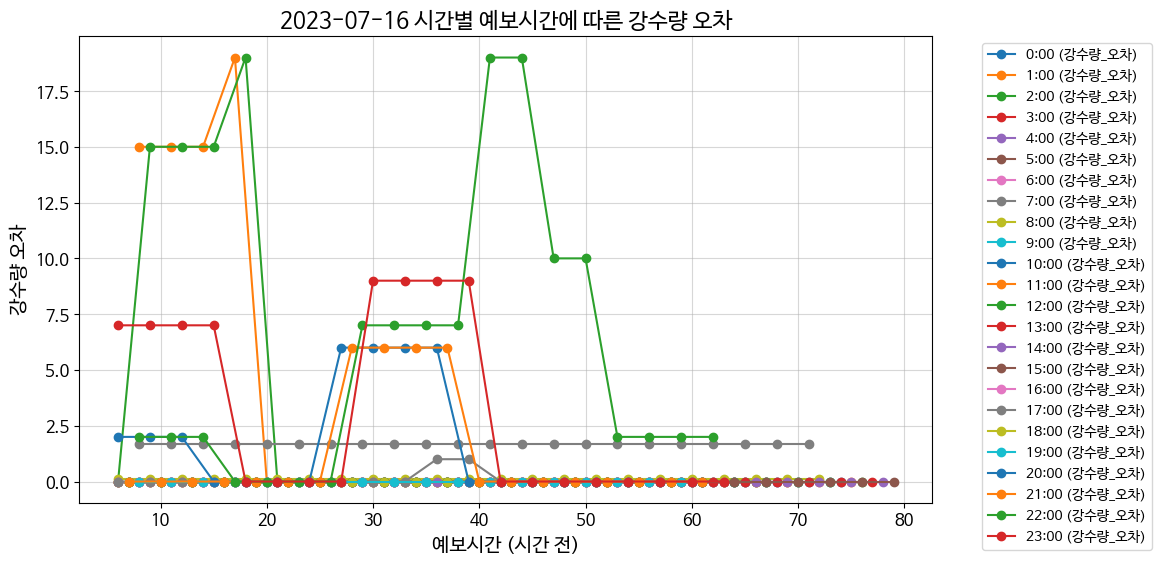

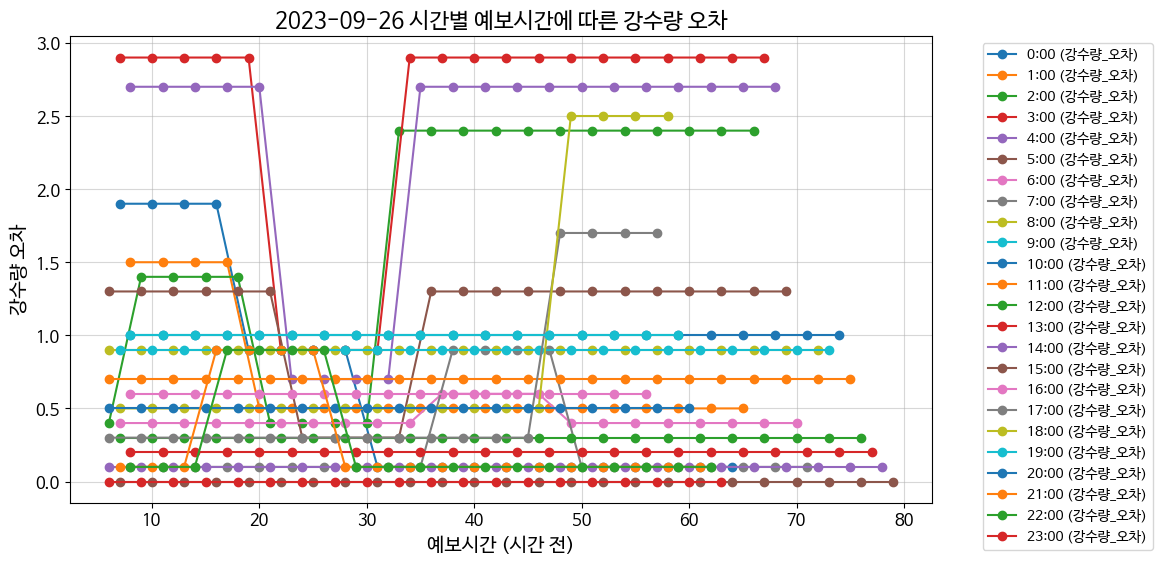

In [419]:
# 강수량 시각화
dates_to_plot = ["2023-07-14", "2023-07-15", "2023-07-16", "2023-09-26"]
plot_for_multiple_dates(dates_to_plot, "강수량_오차", "강수량 오차", "강수량 오차", merged_df)

### **특정 날짜 카테고리 별 오차 결론**
분석 결과, **예보시간이 20~30시간 전일 때 기온 및 강수량의 예보 오차율이 가장 낮은 경향**을 보였습니다.  
이는 예측 모델이 **중기 예보에서 더 정확한 예측**을 제공할 수 있다는 것을 시사합니다.  
특히 예보시간이 짧을수록 예측의 정확도가 떨어지는 경향이 확인되었습니다.


## 3) 월별 평균 오차
모든 데이터를 월로 그룹화하여 월별로 오차를 평균내어 시각화하였습니다.


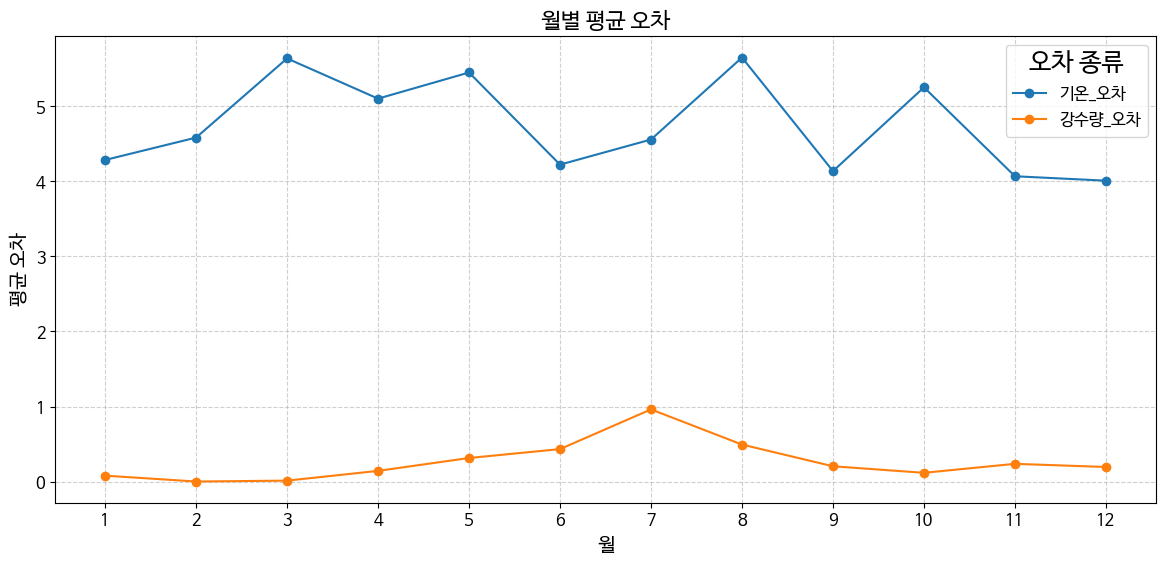

In [420]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
merged_df['예측일시'] = pd.to_datetime(merged_df['예측일시'])

# '월' 컬럼 추가
merged_df['월'] = merged_df['예측일시'].dt.month

# 분석할 오차 값 컬럼 정의
error_cols = ["기온_오차", "강수량_오차"]

# 월별 평균 오차 계산
monthly_avg_errors = merged_df.groupby('월')[error_cols].mean()

# 시각화: 월별 평균 오차 막대 그래프
plt.figure(figsize=(12, 6))
for col in error_cols:
    plt.plot(monthly_avg_errors.index, monthly_avg_errors[col], label=col, marker='o')

plt.title('월별 평균 오차', fontsize=16)
plt.xlabel('월', fontsize=14)
plt.ylabel('평균 오차', fontsize=14)
plt.xticks(monthly_avg_errors.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='오차 종류', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### **월별 평균 오차 결론**
* 기온 오차  
기온 오차는 기온 변화가 큰 **환절기인 봄과 가을에 크게** 나타났습니다.  
이는 기온의 급격한 변동으로 인해 예측의 불확실성이 커지는 시기임을 반영한 결과임을 알 수 있습니다.

* 강수량 오차  
강수량 오차는 **장마철인 7월에 가장 크게** 나타났습니다.  
이는 강수량의 변동성이 크고 예측이 어려운 기후 현상임을 나타냅니다.  
장마철과 같은 비정상적인 기후 현상은 예측 모델에 많은 영향을 미쳤음을 알 수 있습니다.

## 4) 시간대별 평균 오차
데이터를 예측일시의 시간대별로 그룹화하여 평균 오차를 나타냈습니다.

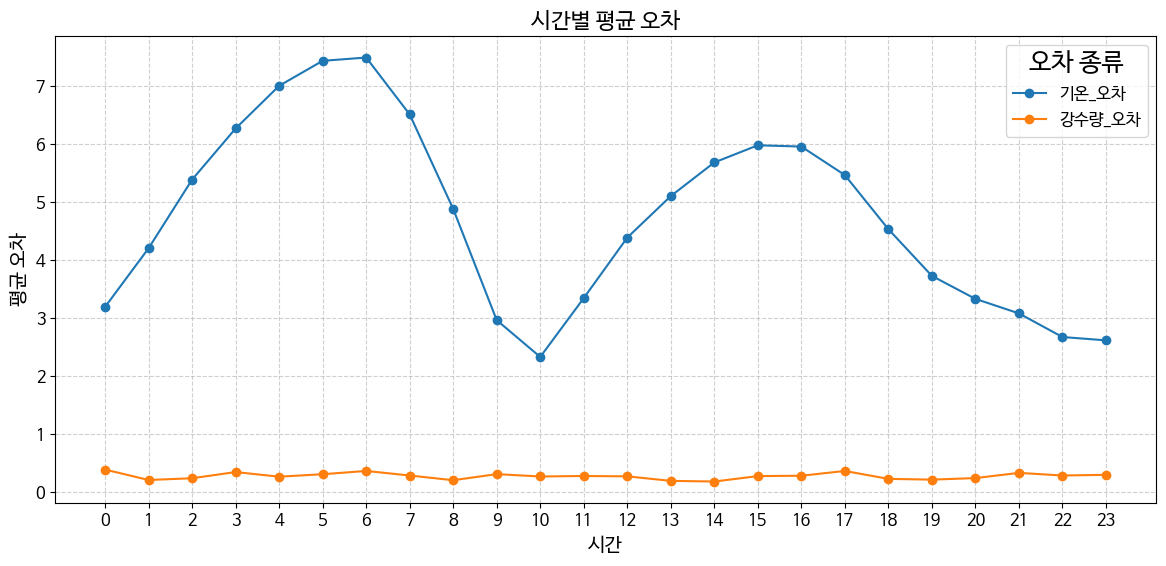

In [421]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df['예측일시'] = pd.to_datetime(merged_df['예측일시'])

# '시간' 컬럼 추출 (시간만 추출)
merged_df['시간'] = merged_df['예측일시'].dt.hour

# 분석할 오차 값 컬럼 정의
error_cols = ["기온_오차", "강수량_오차"]

# 시간별 평균 오차 계산
hourly_avg_errors = merged_df.groupby('시간')[error_cols].mean()

# 시각화: 시간별 평균 오차
plt.figure(figsize=(12, 6))
for col in error_cols:
    plt.plot(hourly_avg_errors.index, hourly_avg_errors[col], label=col, marker='o')

plt.title('시간별 평균 오차', fontsize=16)
plt.xlabel('시간', fontsize=14)
plt.ylabel('평균 오차', fontsize=14)
plt.xticks(hourly_avg_errors.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='오차 종류', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 10시에 기온 오차가 낮은 원인 분석

10시 기온 오차 통계:
count    8326.000000
mean        2.323721
std         3.619314
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        29.500000
Name: 기온_오차, dtype: float64

다른 시간대 기온 오차 통계:
count    175570.000000
mean          4.869086
std           4.019014
min           0.000000
25%           2.100000
50%           4.200000
75%           6.600000
max          33.100000
Name: 기온_오차, dtype: float64


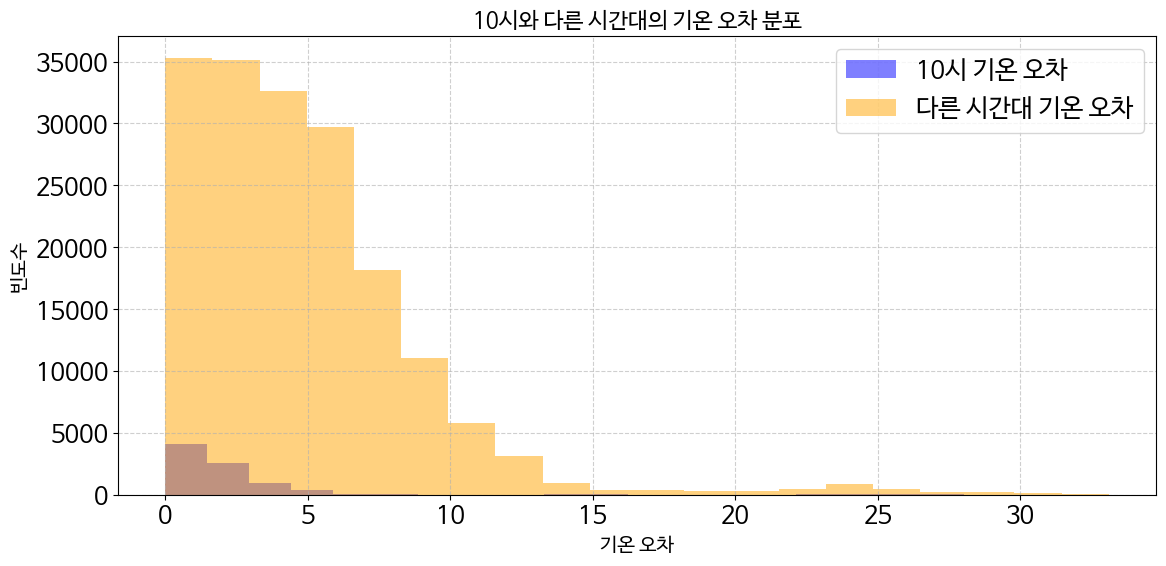

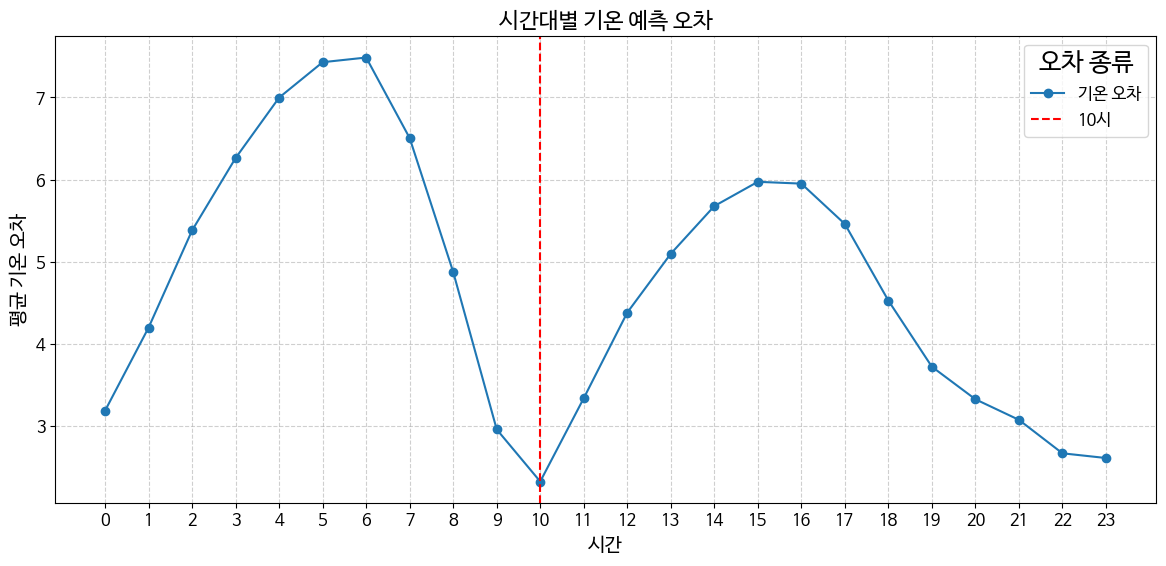

In [422]:
import pandas as pd
import matplotlib.pyplot as plt

# '시간' 컬럼 추출 (시간만 추출)
merged_df['시간'] = merged_df['예측일시'].dt.hour

# 10시와 다른 시간대의 기온 오차를 필터링
ten_am_data = merged_df[merged_df['시간'] == 10]  # 10시 데이터
other_times_data = merged_df[merged_df['시간'] != 10]  # 10시 외의 데이터

# 10시 데이터와 다른 시간대의 기온 오차를 비교
ten_am_error = ten_am_data['기온_오차']
other_times_error = other_times_data['기온_오차']

# 10시와 다른 시간대의 기온 오차 통계 비교
print("10시 기온 오차 통계:")
print(ten_am_error.describe())

print("\n다른 시간대 기온 오차 통계:")
print(other_times_error.describe())

# 10시 기온 오차와 다른 시간대 기온 오차의 분포 시각화
plt.figure(figsize=(12, 6))
plt.hist(ten_am_error, bins=20, alpha=0.5, label='10시 기온 오차', color='blue')
plt.hist(other_times_error, bins=20, alpha=0.5, label='다른 시간대 기온 오차', color='orange')

plt.title('10시와 다른 시간대의 기온 오차 분포', fontsize=16)
plt.xlabel('기온 오차', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 10시 기온 예측 오차에 대한 세부 분석: 시간대별 평균 오차 계산
hourly_avg_error = merged_df.groupby('시간')['기온_오차'].mean()

# 시각화: 시간대별 기온 예측 오차
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg_error.index, hourly_avg_error.values, marker='o', label='기온 오차')

plt.axvline(x=10, color='red', linestyle='--', label="10시")
plt.title('시간대별 기온 예측 오차', fontsize=16)
plt.xlabel('시간', fontsize=14)
plt.ylabel('평균 기온 오차', fontsize=14)
plt.xticks(hourly_avg_error.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='오차 종류', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### **시간대별 평균 오차 결론**
시간대별로 그룹화하여 평균 오차를 나타냈더니 기온 오차 데이터에서 유독 **오전 10시에 오차율이 낮은 것**을 알 수 있었습니다.  

그 원인을 찾기위해 10시 데이터를 기준으로 분석하여 다음과 같은 결론을 추론했습니다.  

**평균 기온 오차가 낮고, 표준편차가 적은 것**을 보아 10시 예측이 다른 시간대에 비해 정확하다는 것을 알 수 있었습니다.  
또한, 10시와 다른 시간대의 기온 오차 분포를 비교하여 10시 시간대의 기온 예측이 잘 맞는 것을 시각적으로 파악할 수 있었습니다.  


## 5) 계절별 오차율
계절별 평균 오차를 선그래프와 히트맵으로 나타냈습니다.

### 선 그래프

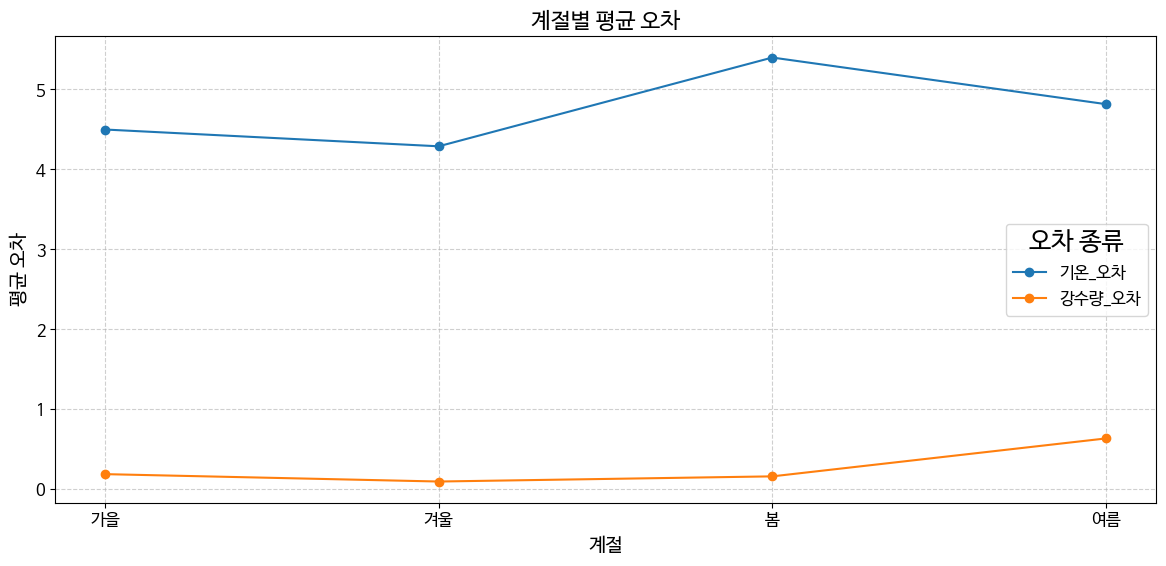

In [423]:
import pandas as pd
import matplotlib.pyplot as plt

# '계절' 컬럼 추가 (날짜에 따라 계절을 분류)
def get_season(month):
    if month in [12, 1, 2]:
        return '겨울'
    elif month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    else:
        return '가을'

merged_df['계절'] = merged_df['예측일시'].dt.month.apply(get_season)

# 분석할 오차 값 컬럼 정의
error_cols = ["기온_오차", "강수량_오차"]

# 계절별 평균 오차 계산
seasonal_avg_errors = merged_df.groupby('계절')[error_cols].mean()

# 시각화: 계절별 평균 오차 그래프
plt.figure(figsize=(12, 6))

# 각 오차 컬럼에 대해 그래프 그리기
for col in error_cols:
    plt.plot(seasonal_avg_errors.index, seasonal_avg_errors[col], label=col, marker='o')

plt.title('계절별 평균 오차', fontsize=16)
plt.xlabel('계절', fontsize=14)
plt.ylabel('평균 오차', fontsize=14)
plt.xticks(seasonal_avg_errors.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='오차 종류', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 히트맵

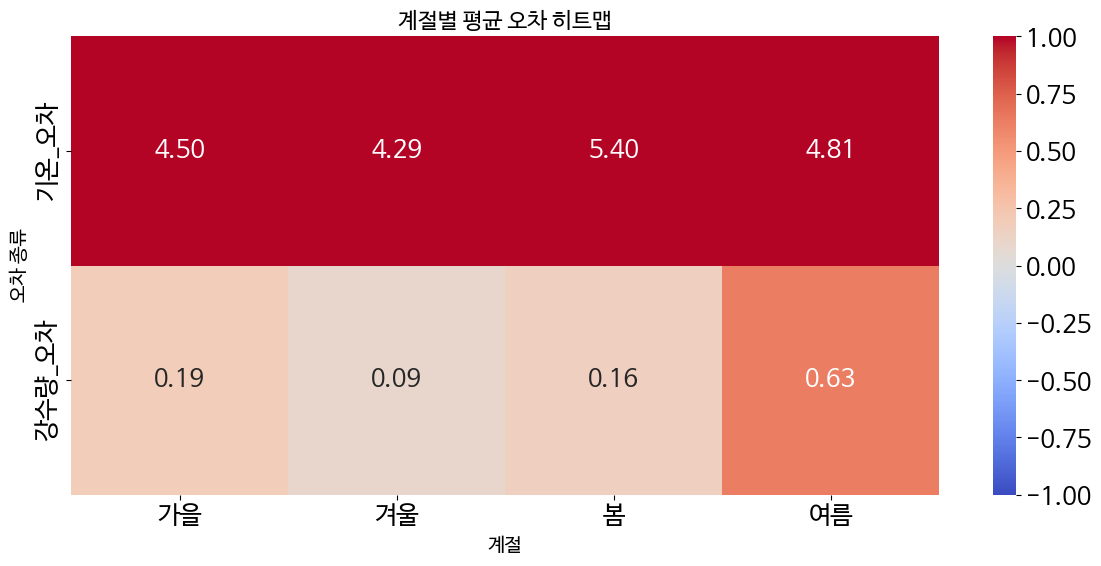

In [424]:
import seaborn as sns

# 계절별 평균 오차를 히트맵으로 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(seasonal_avg_errors.T, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, cbar=True)

plt.title('계절별 평균 오차 히트맵', fontsize=16)
plt.xlabel('계절', fontsize=14)
plt.ylabel('오차 종류', fontsize=14)
plt.tight_layout()
plt.show()


### **계절별 오차율 결론**
선 그래프에서 알 수 있듯이 기온은 겨울에서 여름으로 넘어가는 **봄에 오차율**이 가장 크게 나타났고,  
강수량은 장마가 있는 **여름에 가장 큰 오차율**을 보였습니다.  

히트맵에서는 각 계절에 따른 기온과 강수량 예측 오차의 평균을 한눈에 확인할 수 있었습니다.  
**여름에 강수량 오차가 상대적으로 크게** 나타났고, **기온 오차는 상대적으로 모든 계절에 비슷**하다는 것을 알 수 있었습니다.

## 6) 실제/예측 시계열 - 일별 평균
기온과 강수량의 예측 데이터와 실제 데이터를 시계열 그래프로 비교하여 일별 평균을 나타냈습니다.

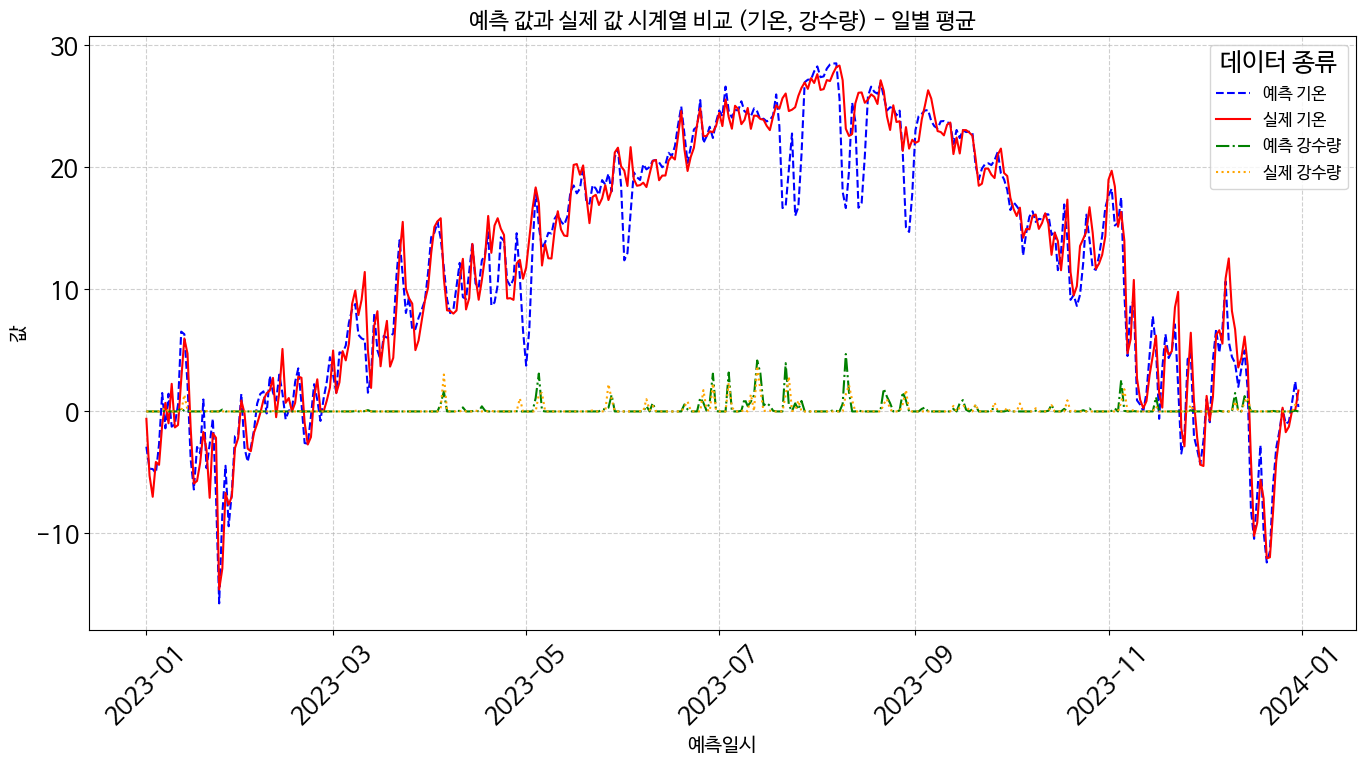

In [425]:
# 예시: 하루 단위로 평균값 구하기
merged_df['일'] = merged_df['예측일시'].dt.date
daily_avg = merged_df.groupby('일')[['기온_예측', '기온_실제', '강수량_예측', '강수량_실제']].mean()

# 시계열 그래프
plt.figure(figsize=(14, 8))
plt.plot(daily_avg.index, daily_avg['기온_예측'], label='예측 기온', color='b', linestyle='--')
plt.plot(daily_avg.index, daily_avg['기온_실제'], label='실제 기온', color='r', linestyle='-')
plt.plot(daily_avg.index, daily_avg['강수량_예측'], label='예측 강수량', color='g', linestyle='-.')
plt.plot(daily_avg.index, daily_avg['강수량_실제'], label='실제 강수량', color='orange', linestyle=':')

plt.title('예측 값과 실제 값 시계열 비교 (기온, 강수량) - 일별 평균', fontsize=16)
plt.xlabel('예측일시', fontsize=14)
plt.ylabel('값', fontsize=14)
plt.legend(title='데이터 종류', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### **실제/예측 시계열 - 일별 평균 결론**
* 강수량 예측  
강수량 예측은 **상대적으로 일정한 차이**를 보였으며, 예측 모델이 일정한 정확도를 유지하는 경향을 확인할 수 있었습니다.

* 기온 예측  
기온 예측은 **5월에서 9월 사이에 실제 값과 크게 벗어나는 경향**을 보였으며, 이는 **여름철 고온 현상이나 이상 기후**로 인해 예측이 어려운 시기임을 나타냅니다.


## 7) 기온/강수량 예보 정확도

In [428]:
import pandas as pd

# 기온 오차 계산 (기온_예측 - 기온_실제)
merged_df['기온_오차'] = abs(merged_df['기온_예측'] - merged_df['기온_실제'])

# 강수량 오차 계산 (강수량_예측 - 강수량_실제)
merged_df['강수량_오차'] = abs(merged_df['강수량_예측'] - merged_df['강수량_실제'])

# 기온 정확도 계산: 오차가 3도 이하일 경우 정확한 예측
merged_df['기온_정확도'] = (merged_df['기온_오차'] <= 3).astype(int)

# 강수량 정확도 계산: 오차가 1mm 이하일 경우 정확한 예측
merged_df['강수량_정확도'] = (merged_df['강수량_오차'] <= 1).astype(int)

# 기온과 강수량의 정확도 계산 (백분율로 표현)
기온_정확도 = merged_df['기온_정확도'].mean() * 100
강수량_정확도 = merged_df['강수량_정확도'].mean() * 100

# 결과 출력
print(f"기온 정확도: {기온_정확도:.2f}%")
print(f"강수량 정확도: {강수량_정확도:.2f}%")


기온 정확도: 38.60%
강수량 정확도: 94.20%


### **기온/강수량 예보 정확도 결론**
기온은 **3도** 차이, 강수량은 **1mm**로 기준을 두고 예측하였습니다.  
이때, **기온의 정확도는 38.60%, 강수량은 94.20%**를 나타냈습니다.

# **7. 결론**  

본 분석을 통해 기온과 강수량 예측에서 중요한 패턴을 확인할 수 있었습니다.  

기온 예측의 정확도는 특정 시간대인 오전 10시와 예보시간 20~30시간 전에서 더 높았으며, 기온 오차는 환절기와 여름철에 크게 발생하는 경향이 있음을 알 수 있었습니다.  

강수량 예측은 상대적으로 높은 정확도를 보였으나, 여름철 장마 기간과 같은 특수한 기후 조건에서는 예측 오차가 크게 나타났습니다.


**기온 예측 정확도 향상 방안**

기온 예측 정확도를 향상시키기 위해, 특히 환절기와 여름철의 기온 변동성을 더 잘 반영할 수 있는 모델 개선이 필요합니다.  
또한, 특정 시간대별 예측 성능을 고려한 모델 튜닝이 필요할 수 있습니다.  


**강수량 예측 정확도 향상 방안**

강수량 예측 정확도는 높지만, 장마철과 같은 특수한 기후 현상에 대한 예측 성능을 높이는 것이 중요합니다.  
이를 위해 기후 변화를 보다 정확하게 반영하는 모델링 기법이 요구됩니다.  
  
  
본 보고서에서 제시된 분석 결과와 개선 방안을 바탕으로, 예보 모델의 정확도를 향상시키기 위한 지속적인 연구와 모델 개선이 필요합니다.

